In [1]:
from tesarot.lc_analysis import lc_ana
from tesarot.tpf_analysis import ana_tpf
from tesarot.lc_analysis import plotter_lc
from tesarot.tpf_analysis import plotter_tpf
from tesarot.tpf_analysis import plotter_tpf_all
from tesarot.tpf_analysis import wcs_tpf
from tesarot.utils import utils
import astropy.units as u
import os
import pandas as pd


target_for_dl= "TIC17198188"
exptime=120
out_dir ="./data"


target = target_for_dl.replace(" ","")
out_dir_for_target = utils.make_output_folder_for_target(target, out_dir)
radius_gaia_search = (12/2.0) * 20*u.arcsec*1.5

## lc analysis
print("lc analysis")
result_file_name =os.path.join(out_dir_for_target, "search_resut_lc_%s.csv" % target)
if os.path.exists(result_file_name):
    lc_collection, search_result = lc_ana.load_data(out_dir_for_target, target)
else:
    lc_collection, search_result = lc_ana.get_tess_lcs(target_for_dl, exptime=exptime)
    if lc_collection is None:
        print("no data:",target_for_dl)
        #return None
    lc_ana.save_lcs(lc_collection, search_result, out_dir_for_target)
    lc_ana.save_search_result(search_result, target, out_dir_for_target)
print(search_result)
file_heads = utils.make_output_name_for_lcs(search_result)
plotter_lc.plot_lcs(lc_collection, target, file_heads, out_dir_for_target)
periods = lc_ana.get_periods(lc_collection)


## tpf analysis
print("tpf analysis")

result_file_name_tpf =os.path.join(out_dir_for_target, "search_resut_tpf_%s.csv" % target)
if os.path.exists(result_file_name_tpf):
    tpfs, search_result_tpf =ana_tpf.load_data_tpf(out_dir_for_target, target)

else:
    tpfs, search_result_tpf = ana_tpf.get_tess_tpf(target_for_dl, exptime=exptime)
    if tpfs is None:
        print("no data:",target_for_dl)
        #return None        
    ana_tpf.save_tpf(tpfs, search_result_tpf,  out_dir_for_target)
    ana_tpf.save_search_result_tpf(search_result_tpf, target, out_dir_for_target)
print(search_result_tpf)

file_heads_tpf = utils.make_output_name_for_tpfs(search_result_tpf)
ra, dec, gaia_mag, gaia_stars = utils.get_gaia_stars(target, radius_gaia_search)
plotter_tpf.plot_tpfs_with_gaia(tpfs, target, out_dir_for_target, gaia_stars, file_heads_tpf)

## differentail imaging
print("differential imaging")
avg_images, diff_images, periods, folded_lcs, folded_bin_lcs = ana_tpf.make_difference_image_for_tpfs(tpfs, \
    period_inputs  = periods, aperture_mask ="default")



lc analysis
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120    17198188      0.0
  1 TESS Sector 44 2021   SPOC     120    17198188      0.0
tpf analysis
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120    17198188      0.0
  1 TESS Sector 44 2021   SPOC     120    17198188      0.0
differential imaging
diff_image:0
diff_image:1


5.350033982115889 5.539256432003325
5.200132671097213 5.734842830713943
[64.6893236] [21.03051435]
5.441103357541279 5.030775777457999
5.484711096827744 5.113403253286854
[64.69090136] [21.03140911]


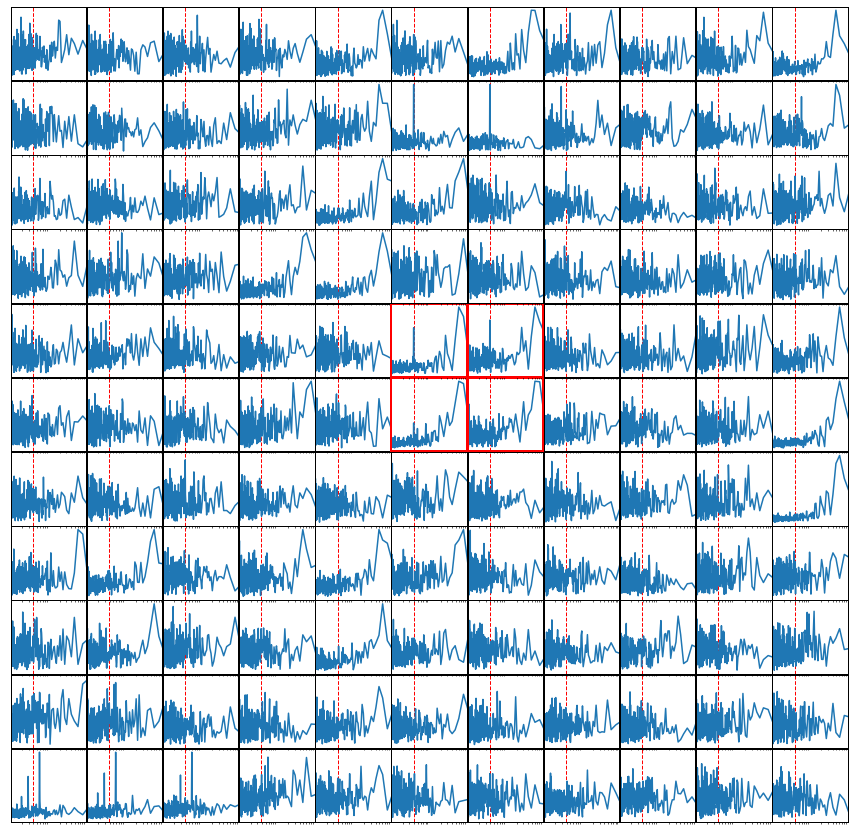

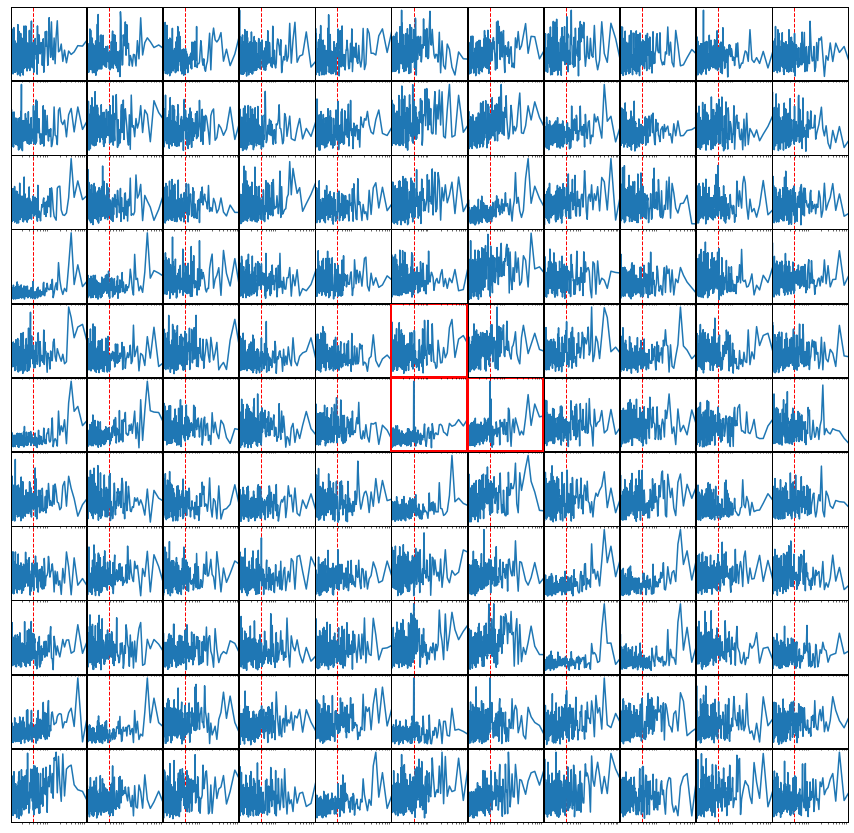

In [3]:
import importlib
importlib.reload(ana_tpf)
importlib.reload(utils)



wcs_arr = wcs_tpf.get_wcs_from_tpfs(tpfs)
xy_cen_arr, ra_dec_cen_arr = ana_tpf.compute_centroids_for_images(diff_images, wcs_arr, ra[0], dec[0])
plotter_tpf.plot_diffimages_with_gaia(avg_images, diff_images, xy_cen_arr, target, \
    gaia_stars, periods,file_heads_tpf,  wcs_arr, out_dir=out_dir_for_target)

files = plotter_tpf_all.make_output_name_for_tpfs_periodogram(search_result, out_dir_for_target)
plotter_tpf_all.periodogram_for_tpfs(tpfs, files,periods)
utils.save_results(gaia_stars, periods, ra_dec_cen_arr, out_dir_for_target)

In [ ]:
n